
## 🔬 Cancer Classification Using Logistic Regression

### 🧾 **Project Overview**

In this project, we build a **logistic regression classifier** to determine whether a tumor is **malignant** or **benign** based on clinical features. Logistic regression is a widely used algorithm for binary classification problems, and it’s particularly useful in healthcare-related tasks due to its interpretability and speed.

We will follow a structured machine learning pipeline, completing each task step-by-step to ensure a clean, accurate, and reproducible workflow.

---

### ✅ **Project Workflow**

1. **📌 Introduction & Importing Libraries**  
   We begin by importing essential Python libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

2. **📥 Download Dataset from Kaggle**  
   The dataset will be downloaded directly from Kaggle using the Kaggle API. It contains relevant medical features related to tumor samples.

3. **🔍 Load & Explore the Dataset**  
   We will load the dataset into a DataFrame and perform exploratory data analysis (EDA) to understand the structure, check for missing values, visualize distributions, and examine correlations between features.

4. **🔤 Perform Label Encoding**  
   The target variable (e.g., diagnosis) will be encoded into numerical format using `LabelEncoder`, converting 'malignant' and 'benign' into 0 and 1.

5. **🧪 Data Splitting & Feature Scaling**  
   The dataset will be split into **independent features (X)** and **target (y)**. We'll use `train_test_split` to create training and test sets. Then, `StandardScaler` will be used to normalize the feature values for optimal model performance.

6. **🧠 Build Logistic Regression Classifier**  
   We'll create and train a **LogisticRegression** model using `scikit-learn`. The model will learn to distinguish between benign and malignant tumors.

7. **📊 Evaluate Model Performance**  
   Finally, we’ll assess the model’s performance using accuracy, confusion matrix, and classification report. These metrics will help us understand how well the model is performing on unseen data.

---

### 🎯 **Goal**
To build an accurate and interpretable model that can predict the nature of a tumor—**malignant or benign**—helping in early detection and diagnosis.

---

Let me know if you'd like me to turn this into a notebook header, a report format, or continue with actual code for each step!

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

In [6]:
!pip install kaggle



# Download dataset from Kaggle

In [2]:
#set kaggle API credentials
import os
credentials = {"username":"rafaelramirez21","key":"e8e767bd9d584b997b4dd213bd7b0b93"}
os.environ['KAGGLE_USERNAME'] = credentials['username']
os.environ['KAGGLE_KEY'] = credentials['key']

In [3]:
! kaggle datasets download uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
! unzip /Users/rafaelramirez/anaconda_projects/machine_learning/Breast_Cancer_Wisconsin/breast-cancer-wisconsin-data.zip


Archive:  /Users/rafaelramirez/anaconda_projects/machine_learning/Breast_Cancer_Wisconsin/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [4]:
#load data on dataframe
df = pd.read_csv('/Users/rafaelramirez/anaconda_projects/machine_learning/Breast_Cancer_Wisconsin/data.csv')

In [5]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#count of rows and columns
df.shape

(569, 33)

In [7]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Drop the column with null values
df.dropna(axis=1, inplace = True)

In [9]:
# count of rows and columns
df.shape

(569, 32)

In [10]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Label Encoding

In [22]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
#Encode the diagnosis values
# M as 1 B as 0
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)


In [21]:
#display 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Scaling

In [23]:
#Splitting the dataset into independent and dependent datasets 
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [24]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [47]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [43]:
#print data
print(set(Y_train))

{np.int64(0), np.int64(1)}


# Build a Logistic Regression Model

In [44]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [48]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Performance Evaluation

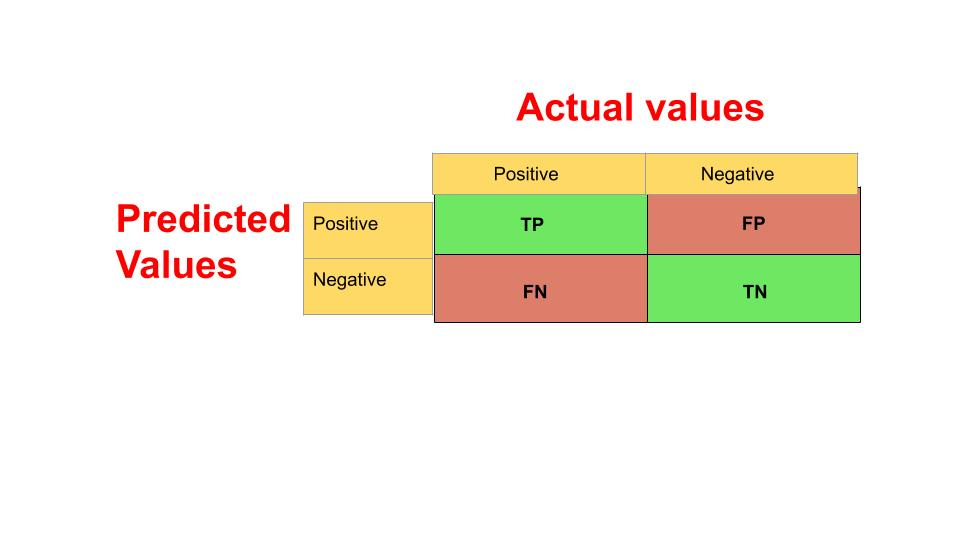

[[93  1]
 [ 3 46]]


<Axes: >

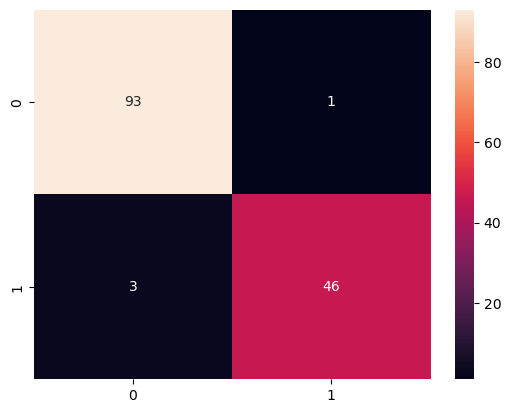

In [53]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm =  confusion_matrix (Y_test, predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [54]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.972027972027972


This means your model is 97% accurate on the test set.


### ✅ **Confusion Matrix Summary**

The matrix shows the classification performance of your model on the test set:

|                         | **Predicted Benign (0)** | **Predicted Malignant (1)** |
|-------------------------|---------------------------|------------------------------|
| **Actual Benign (0)**   | **93** (True Negative)    | **1** (False Positive)       |
| **Actual Malignant (1)**| **3** (False Negative)    | **46** (True Positive)       |

---

### 📈 Interpretation:

- **True Positives (TP = 46)**: Model correctly identified 46 malignant tumors.
- **True Negatives (TN = 93)**: Model correctly identified 93 benign tumors.
- **False Positives (FP = 1)**: Model incorrectly predicted 1 benign tumor as malignant.
- **False Negatives (FN = 3)**: Model missed 3 malignant tumors, predicting them as benign. ⚠️

---

### 🧠 Key Takeaways:

- The model is **highly accurate**, with **only 4 total errors** out of **143 samples**.
- **False negatives are more critical** in medical diagnosis, so the 3 missed malignant cases should be minimized further if possible.
- Very **low false positive rate** (only 1), which is excellent.

